<a href="https://colab.research.google.com/github/TopStrikr/Humpback-Whale-Identification/blob/main/Humpback_Whale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Humpback_whale_identification"

/content/drive/MyDrive/Humpback_whale_identification


In [ ]:
!unzip "/content/drive/MyDrive/Humpback_whale_identification/humpback-whale-identification.zip" -d "/content/drive/MyDrive/Humpback_whale_identification/dataset"

Archive:  /content/drive/MyDrive/Humpback_whale_identification/humpback-whale-identification.zip
replace /content/drive/MyDrive/Humpback_whale_identification/dataset/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Humpback_whale_identification/dataset/train.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   10972 non-null  object
 1   Id      10972 non-null  object
dtypes: object(2)
memory usage: 171.6+ KB


In [ ]:
train.describe()

,Image,Id
count,10972,10972
unique,10972,3285
top,0000e88ab.jpg,new_whale
freq,1,4225


In [ ]:
train.shape

(10972, 2)

In [ ]:
train.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [ ]:
train.tail()

,Image,Id
10967,6f58c9ded.jpg,w_5e8e218
10968,6f595d232.jpg,new_whale
10969,6f5bc9d90.jpg,new_whale
10970,6f5d7c6cf.jpg,w_3de579a
10971,6f5dc5f62.jpg,new_whale


In [ ]:
train.isnull()

,Image,Id
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10967,False,False
10968,False,False
10969,False,False
10970,False,False


In [ ]:
y_train=train["Id"]
xtrain=train.drop(labels=["Id"], axis=1)
y_train.head()

0    w_f48451c
1    w_c3d896a
2    w_20df2c5
3    new_whale
4    new_whale
Name: Id, dtype: object

In [ ]:
train.isnull().sum()

Image    0
Id       0
dtype: int64

In [ ]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

In [ ]:
def prepareImages(train, shape, path):
  x_train=np.zeros((shape,100,100,3))

  count=0
  for fig in train['Image']:

    img = image.load_img("/content/drive/MyDrive/Humpback_whale_identification/dataset/"+path+"/"+fig, target_size=(100, 100, 3))
    x=image.img_to_array(img)
    x=preprocess_input(x)
    x_train[count]=x
    if(count%500==0):
      print("Processing image: ", count+1, ", ", fig)
    count+=1
  return x_train

In [ ]:
x_train=prepareImages(train,train.shape[0],"train")

Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg


In [ ]:
x_train=x_train/255

In [ ]:
print("x_train shape",x_train.shape)

x_train shape (10972, 100, 100, 3)


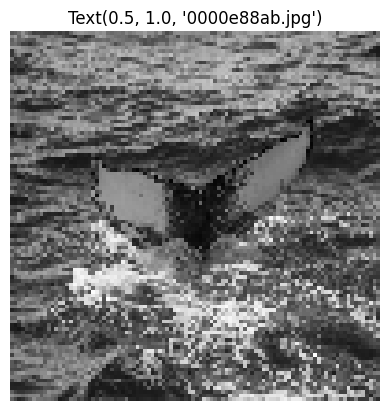

In [ ]:
plt.imshow(x_train[0][:,:,0], cmap="gray")

plt.title(plt.title(train.iloc[0,0]))

plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

In [ ]:
y_train=label_encoder.fit_transform(y_train)

In [ ]:
y_train[0:10]

array([3137, 2507,  439,    0,    0,    0, 2829,    0, 1261, 2131])

In [ ]:
y_train.shape

(10972,)

In [ ]:
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=5005)

#y_train=to_categorical(y_train, num_classes= 5005)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
'''from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau'''
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Now you can use to_categorical directly from keras.utils
from keras.utils import to_categorical




In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters =32, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 50, 50, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        9

In [ ]:
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#optimizer = Adam(learning_rate=0.001)

In [ ]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',
                                          patience=3,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr=0.00001)

In [ ]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
datagen= ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

datagen.fit(x_train)

In [ ]:
epochs=50
batch_size=64

In [ ]:
history=model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                            epochs=50, verbose=2,
                            steps_per_epoch=x_train.shape[0]//batch_size,
                            callbacks=[learning_rate_reduction])

Epoch 1/50


171/171 - 354s - loss: 7.4039 - accuracy: 0.2814 - lr: 0.0010 - 354s/epoch - 2s/step
Epoch 2/50


171/171 - 338s - loss: 5.5623 - accuracy: 0.3687 - lr: 0.0010 - 338s/epoch - 2s/step
Epoch 3/50


171/171 - 324s - loss: 5.0516 - accuracy: 0.3812 - lr: 0.0010 - 324s/epoch - 2s/step
Epoch 4/50


171/171 - 329s - loss: 4.7302 - accuracy: 0.3827 - lr: 0.0010 - 329s/epoch - 2s/step
Epoch 5/50


171/171 - 330s - loss: 4.4633 - accuracy: 0.3809 - lr: 0.0010 - 330s/epoch - 2s/step
Epoch 6/50


171/171 - 331s - loss: 4.2263 - accuracy: 0.3809 - lr: 0.0010 - 331s/epoch - 2s/step
Epoch 7/50


171/171 - 333s - loss: 3.9562 - accuracy: 0.3818 - lr: 0.0010 - 333s/epoch - 2s/step
Epoch 8/50


171/171 - 332s - loss: 3.6883 - accuracy: 0.3810 - lr: 0.0010 - 332s/epoch - 2s/step
Epoch 9/50


171/171 - 327s - loss: 3.4766 - accuracy: 0.3828 - lr: 0.0010 - 327s/epoch - 2s/step
Epoch 10/50


171/171 - 326s - loss: 3.1646 - accuracy: 0.3948 - lr: 0.0010 - 326s/epoch - 2s/step
Epoch 11/50


171/171 - 328s - loss: 2.9115 - accuracy: 0.4082 - lr: 0.0010 - 328s/epoch - 2s/step
Epoch 12/50


171/171 - 326s - loss: 2.6550 - accuracy: 0.4329 - lr: 0.0010 - 326s/epoch - 2s/step
Epoch 13/50


171/171 - 327s - loss: 2.4016 - accuracy: 0.4637 - lr: 0.0010 - 327s/epoch - 2s/step
Epoch 14/50


171/171 - 328s - loss: 2.1675 - accuracy: 0.4983 - lr: 0.0010 - 328s/epoch - 2s/step
Epoch 15/50


171/171 - 331s - loss: 1.9739 - accuracy: 0.5282 - lr: 0.0010 - 331s/epoch - 2s/step
Epoch 16/50


171/171 - 324s - loss: 1.7620 - accuracy: 0.5718 - lr: 0.0010 - 324s/epoch - 2s/step
Epoch 17/50


171/171 - 323s - loss: 1.5838 - accuracy: 0.5971 - lr: 0.0010 - 323s/epoch - 2s/step
Epoch 18/50


171/171 - 322s - loss: 1.4258 - accuracy: 0.6373 - lr: 0.0010 - 322s/epoch - 2s/step
Epoch 19/50


171/171 - 326s - loss: 1.2733 - accuracy: 0.6705 - lr: 0.0010 - 326s/epoch - 2s/step
Epoch 20/50


171/171 - 329s - loss: 1.1605 - accuracy: 0.6977 - lr: 0.0010 - 329s/epoch - 2s/step
Epoch 21/50


171/171 - 325s - loss: 1.0440 - accuracy: 0.7216 - lr: 0.0010 - 325s/epoch - 2s/step
Epoch 22/50


171/171 - 332s - loss: 0.9461 - accuracy: 0.7485 - lr: 0.0010 - 332s/epoch - 2s/step
Epoch 23/50


171/171 - 332s - loss: 0.8863 - accuracy: 0.7610 - lr: 0.0010 - 332s/epoch - 2s/step
Epoch 24/50


171/171 - 328s - loss: 0.7855 - accuracy: 0.7856 - lr: 0.0010 - 328s/epoch - 2s/step
Epoch 25/50


171/171 - 329s - loss: 0.7164 - accuracy: 0.8038 - lr: 0.0010 - 329s/epoch - 2s/step
Epoch 26/50


171/171 - 329s - loss: 0.6775 - accuracy: 0.8074 - lr: 0.0010 - 329s/epoch - 2s/step
Epoch 27/50


171/171 - 330s - loss: 0.6217 - accuracy: 0.8308 - lr: 0.0010 - 330s/epoch - 2s/step
Epoch 28/50


171/171 - 334s - loss: 0.5878 - accuracy: 0.8338 - lr: 0.0010 - 334s/epoch - 2s/step
Epoch 29/50


171/171 - 327s - loss: 0.5451 - accuracy: 0.8494 - lr: 0.0010 - 327s/epoch - 2s/step
Epoch 30/50


171/171 - 331s - loss: 0.4707 - accuracy: 0.8718 - lr: 0.0010 - 331s/epoch - 2s/step
Epoch 31/50


171/171 - 335s - loss: 0.4703 - accuracy: 0.8661 - lr: 0.0010 - 335s/epoch - 2s/step
Epoch 32/50


171/171 - 328s - loss: 0.4276 - accuracy: 0.8808 - lr: 0.0010 - 328s/epoch - 2s/step
Epoch 33/50


171/171 - 326s - loss: 0.4143 - accuracy: 0.8794 - lr: 0.0010 - 326s/epoch - 2s/step
Epoch 34/50


171/171 - 328s - loss: 0.3849 - accuracy: 0.8863 - lr: 0.0010 - 328s/epoch - 2s/step
Epoch 35/50


171/171 - 330s - loss: 0.3595 - accuracy: 0.8953 - lr: 0.0010 - 330s/epoch - 2s/step
Epoch 36/50


171/171 - 330s - loss: 0.3312 - accuracy: 0.9041 - lr: 0.0010 - 330s/epoch - 2s/step
Epoch 37/50


171/171 - 329s - loss: 0.3236 - accuracy: 0.9092 - lr: 0.0010 - 329s/epoch - 2s/step
Epoch 38/50


171/171 - 332s - loss: 0.3108 - accuracy: 0.9098 - lr: 0.0010 - 332s/epoch - 2s/step
Epoch 39/50


171/171 - 331s - loss: 0.3047 - accuracy: 0.9135 - lr: 0.0010 - 331s/epoch - 2s/step
Epoch 40/50


171/171 - 326s - loss: 0.2881 - accuracy: 0.9167 - lr: 0.0010 - 326s/epoch - 2s/step
Epoch 41/50


171/171 - 331s - loss: 0.2811 - accuracy: 0.9197 - lr: 0.0010 - 331s/epoch - 2s/step
Epoch 42/50


171/171 - 330s - loss: 0.2661 - accuracy: 0.9217 - lr: 0.0010 - 330s/epoch - 2s/step
Epoch 43/50


171/171 - 329s - loss: 0.2685 - accuracy: 0.9194 - lr: 0.0010 - 329s/epoch - 2s/step
Epoch 44/50


171/171 - 332s - loss: 0.2584 - accuracy: 0.9235 - lr: 0.0010 - 332s/epoch - 2s/step
Epoch 45/50


171/171 - 330s - loss: 0.2207 - accuracy: 0.9387 - lr: 0.0010 - 330s/epoch - 2s/step
Epoch 46/50


171/171 - 328s - loss: 0.2268 - accuracy: 0.9336 - lr: 0.0010 - 328s/epoch - 2s/step
Epoch 47/50


171/171 - 331s - loss: 0.2271 - accuracy: 0.9322 - lr: 0.0010 - 331s/epoch - 2s/step
Epoch 48/50


171/171 - 335s - loss: 0.2162 - accuracy: 0.9372 - lr: 0.0010 - 335s/epoch - 2s/step
Epoch 49/50


171/171 - 335s - loss: 0.2176 - accuracy: 0.9356 - lr: 0.0010 - 335s/epoch - 2s/step
Epoch 50/50


171/171 - 334s - loss: 0.2174 - accuracy: 0.9340 - lr: 0.0010 - 334s/epoch - 2s/step


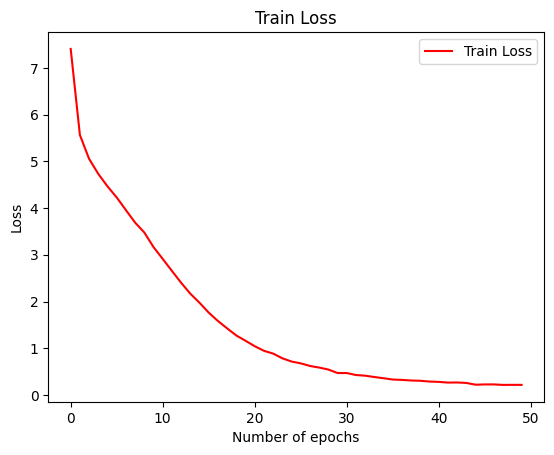

In [ ]:
plt.plot(history.history['loss'], color='r', label="Train Loss")
plt.title("Train Loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

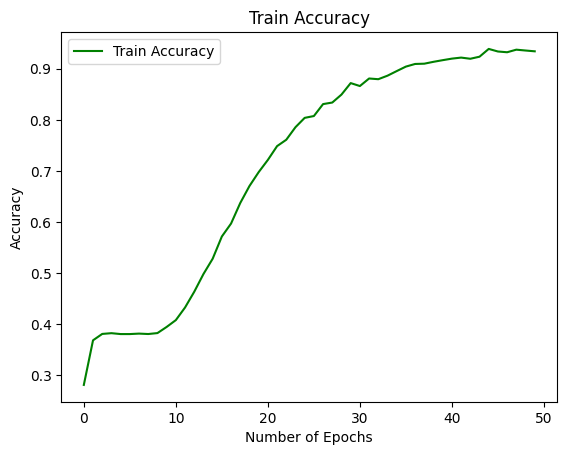

In [ ]:
plt.plot(history.history['accuracy'], color='g', label="Train Accuracy")
plt.title("Train Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])

Train accuracy of the model:  0.933993399143219


In [ ]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.217448428273201
